For a start, this can be run as is and explored in the Jupyter GUI launched by `ts.slider()` below.
(It might be necessary to select a mesh to trigger the first visualization in the beginning. Ignore the `picongpu_idProvider` mesh, it contains internal data only and is not suitable for visualization.)


Tasks:

1. Computation of the particle histograms is relatively cost-intensive. Unselect "Always Refresh" to have a more responsive experience visualizing the meshes. Use "Refresh now!" to compute the particle histogram on demand.
2. Select a mesh. While all meshes are 3D (they occupy the same space after all), two of them are scalar and the other two are vector types. Which? How do you see the difference?
3. Open the slice selection tab. In order to visualize a 3D field in two dimensions, the openPMD-viewer lets you select a slice within the 3D field. Can you use the slice selection to figure out into which direction the simulation propagates? Tip: You can pick an Iteration number from the top to see the simulation state at different stages. Use the Plus `+` button to view the selected slice as the simulation goes on.
4. Try plotting a particle histogram that matches the observed dynamics at the slice. Note that both one- and two-dimensional histograms are supported.
5. Bonus: Try visualizing the output from the heat equation example written earlier. Note that the openPMD-viewer is written for random-access of visualization data, while variable-based encoding is (currently) written mostly for streaming workflows where Iterations can only be accessed one after another. Hence, do not use the output created with variable-based encoding for visualization here. Note: The openPMD-viewer assumes specification of the parent directory containing openPMD data. This directory should not contain multiple openPMD datasets.
6. Bonus: You might have notices that the colorbar is recomputed for each Iteration. In order to have a more consistent output, try fixing one colorbar.

Tip: When installing the openpmd-viewer from our distribution channels, a command line tool `openPMD_notebook` is additionally installed that pre-fills a Notebook of this kind and launches it.

In [1]:
from openpmd_viewer import OpenPMDTimeSeries
import openpmd_api as opmd
opmd.file_extensions
# Note: specify the parent directory here instead of the dataset itself.
# The openPMD-viewer will then take care of finding the dataset.
path = "/pfs/lustrep3/scratch/project_465001310/poeschel/2024-09-20/8_v1/simOutput/openPMD"

In [2]:
ts = OpenPMDTimeSeries(path)

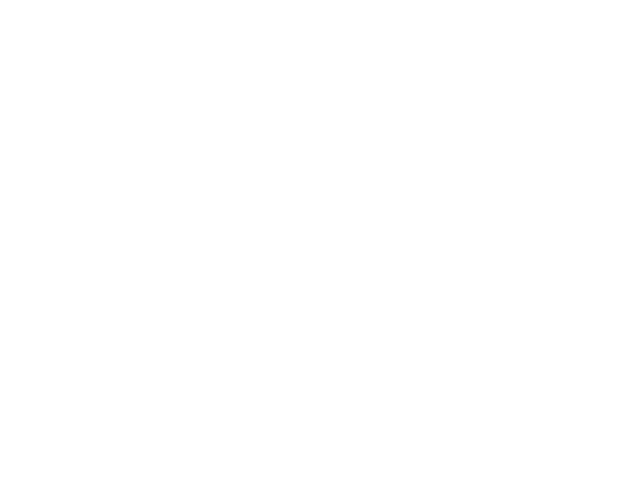

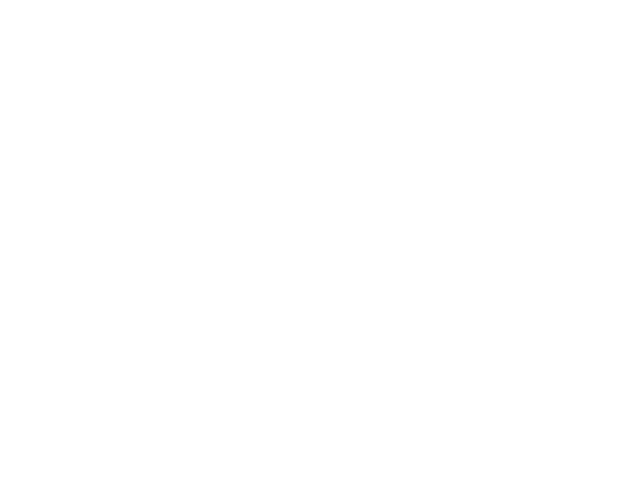

In [3]:
%matplotlib ipympl
ts.slider()

Bonus: The dataset has been written without compression. 
We have seen before how to compress a dataset in ADIOS2.
What about compressing a dataset after it has been written?
Next to `openpmd-ls`, the openPMD-api install a command line tool `openpmd-pipe` which can be used to redirect openPMD data from a data source to another data sink.
Since both the source and sink can be configured separately, this turns `openpmd-pipe` into a useful adaptor for multiple kinds of use cases:

1. Converting between backends.
2. Capturing a running stream and writing it to disk (a stream can have multiple readers log on and off spontaneously).
3. Compressing/decompressing a written dataset.
4. Converting between iteration encodings.
5. Defragmenting an ADIOS2 dataset (ADIOS2 files store data chunks as they are specified at write time).
6. As a starting point for more customized transformations.

Check out the documentation at `openpmd-pipe --help` as well [online](https://openpmd-api.readthedocs.io/en/0.16.0/utilities/cli.html).
Complete the below command line call in order to compress Iteration 2000 from the dataset. Hint: A complete compression configuration is contained in this folder.

```bash
MPICH_GPU_SUPPORT_ENABLED=0 openpmd-pipe \
    --infile /pfs/lustrep3/scratch/project_465001310/poeschel/2024-09-20/8_v1/simOutput/openPMD/simData_002000.bp5 \
    --outfile ~/compressed_%T.%E \
    --outconfig <fill_me_out>
```
The uncompressed file contains a bit more than 6GB.
Check the size of the compressed file.

The configurations used so far contained a configuration for the [C-Blosc2](https://github.com/Blosc/c-blosc2) compressor.
Try alternatively using the bzip2 compressor.
What do you notice?
Hint: You will see the reason why there are specialized compressor libraries such as C-Blosc for HPC usage.